In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

## Generating DataFrame

In [101]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)
df = pd.read_csv("all_data.csv")
df = df.dropna(how='all')
df = df[df['Order Date'].str[0:2]!='Or']


## Generating features

In [102]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df['Total Sale'] = df['Price Each'] * df['Quantity Ordered']
df['Order Date'] = pd.to_datetime(df['Order Date'])

## Tests

In [123]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Sale,Day,Rolling Average
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,2019-04-19,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,2019-04-07,NaN
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,2019-04-12,NaN
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,2019-04-12,NaN
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,2019-04-30,NaN


# What was the best month for sales? How much was earned that month?

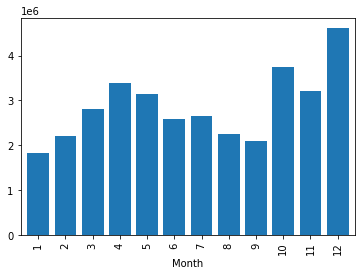

In [104]:
sales_month = df.groupby('Month').agg({'Order ID': 'count',
                                       'Total Sale': 'sum'})
sales_month
sales_month['Total Sale'].plot(kind='bar', width=0.8)
plt.show()

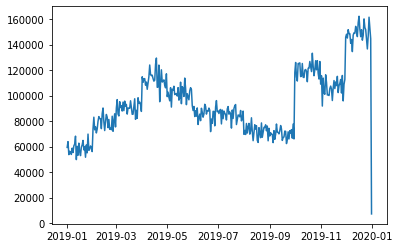

In [122]:
import datetime as dt
day_sales = df.set_index('Order Date').resample('D').sum()
df['Rolling Average'] = df['Total Sale'].rolling(window=7, center=False).mean()

plt.plot(day_sales['Rolling Average'])
plt.show()